In [1]:
#Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusting configuration of plots

In [2]:
#Import Files
df = pd.read_csv('movies.csv') #Read the csv file

In [3]:
#View Data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Checking for missing values in each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.2f}%'.format(col, pct_missing*100))

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [5]:
#Filling the missing values

df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['released'] = df['released'].fillna(method='ffill')
df['score'] = df['score'].fillna(df['score'].mean())
df['votes'] = df['votes'].fillna(df['votes'].mean())
df['writer'] = df['writer'].fillna("Unknown")
df['star'] = df['star'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['budget'] = df['budget'].fillna(df['budget'].median())
df['gross'] = df['gross'].fillna(df['gross'].median())
df['company'] = df['company'].fillna("Unknown")
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())

C:\Users\aakas\AppData\Local\Temp\ipykernel_3056\1663526528.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['released'] = df['released'].fillna(method='ffill')


In [6]:
df.dtypes #Checking datatypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Checking for missing values in each column again after filling missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.2f}%'.format(col, pct_missing*100))

name - 0.00%
rating - 0.00%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.00%
gross - 0.00%
company - 0.00%
runtime - 0.00%


In [8]:
#Correcting year of release

def extract_chars_after_comma(s):
    if pd.isna(s):  # Check for NaN values
        return ''
    pos = s.find(' (')  # Find position of the comma
    if pos != -1:  # Check if comma is found
        return s[pos-4:pos]  # Extract 4 characters after the comma
    else:
        return ''  # Return empty string if comma is not found

# Apply the function to the 'released' column
df['yearcorrect'] = df['released'].apply(extract_chars_after_comma)

In [9]:
df.drop_duplicates() #Dropping Duplicates

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.000000,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.000000,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.000000,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.000000,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.000000,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.100000,1.800000e+01,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,20205757.0,Unknown,90.000000,2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000.0,20205757.0,Cactus Blue Entertainment,90.000000,2020
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,20205757.0,Embi Productions,107.261613,2020
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.390411,8.810850e+04,James Randall,James Randall,Christina Roz,United States,15000.0,20205757.0,Unknown,120.000000,2020


In [10]:
# Count the occurrences of each year
year_counts = df['yearcorrect'].value_counts().sort_index()

# Convert to DataFrame for tabulate
year_counts_df = pd.DataFrame(year_counts).reset_index()
year_counts_df.columns = ['Year', 'Number of Movies']

# Sort by 'Number of Movies' in descending order
year_counts_df = year_counts_df.sort_values(by='Number of Movies', ascending=False)
# Display as a table using tabulate
print(tabulate(year_counts_df, headers='keys', tablefmt='psql'))

+----+--------+--------------------+
|    |   Year |   Number of Movies |
|----+--------+--------------------|
| 39 |   2019 |                228 |
| 35 |   2015 |                213 |
| 31 |   2011 |                212 |
| 27 |   2007 |                212 |
|  6 |   1986 |                211 |
| 23 |   2003 |                207 |
| 14 |   1994 |                206 |
| 38 |   2018 |                205 |
| 18 |   1998 |                205 |
| 21 |   2001 |                205 |
| 28 |   2008 |                204 |
| 11 |   1991 |                204 |
| 37 |   2017 |                203 |
| 15 |   1995 |                203 |
| 33 |   2013 |                200 |
| 25 |   2005 |                200 |
| 20 |   2000 |                200 |
| 13 |   1993 |                200 |
|  9 |   1989 |                200 |
| 16 |   1996 |                199 |
|  8 |   1988 |                199 |
| 17 |   1997 |                198 |
| 36 |   2016 |                198 |
| 10 |   1990 |                197 |
|

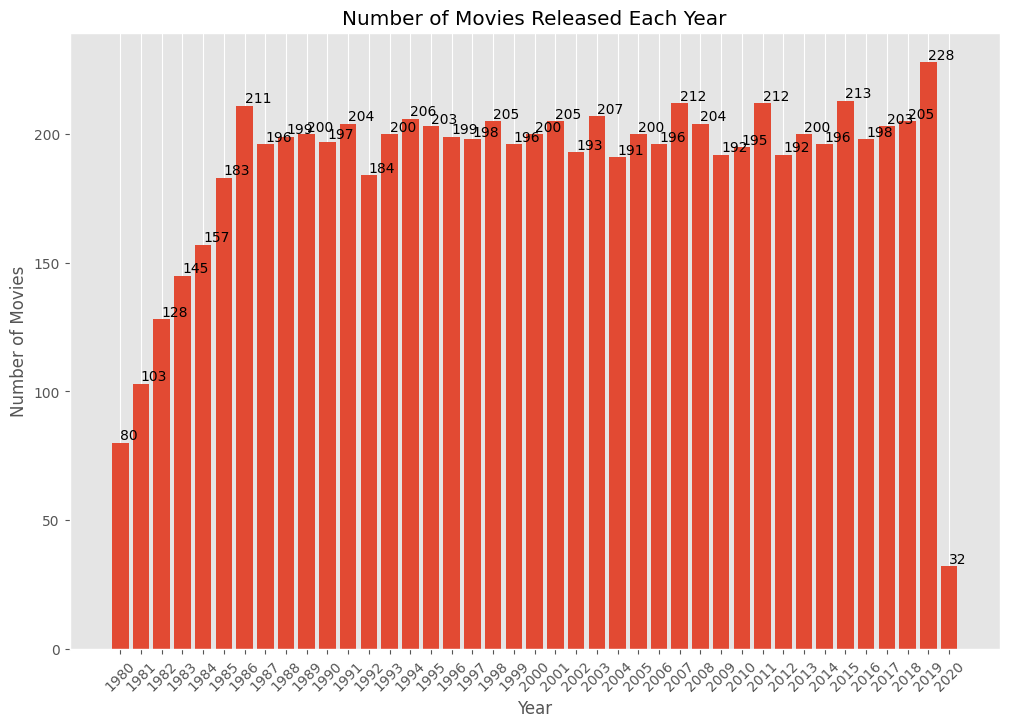

In [11]:
# Plot the data movies vs year
bars = plt.bar(year_counts.index.astype(str), year_counts.values)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding the count numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom')  # va: vertical alignment

plt.show()


In [12]:
#Rating count
rating_counts = df['rating'].value_counts().sort_index()

# Convert to DataFrame for tabulate
rating_counts_df = pd.DataFrame(rating_counts).reset_index()
rating_counts_df.columns = ['Rating', 'Number of Movies']

# Sort by 'Number of Movies' in descending order
rating_counts_df = rating_counts_df.sort_values(by='Number of Movies', ascending=False)

# Display as a table using tabulate
print(tabulate(rating_counts_df, headers='keys', tablefmt='psql'))

+----+-----------+--------------------+
|    | Rating    |   Number of Movies |
|----+-----------+--------------------|
|  6 | R         |               3774 |
|  5 | PG-13     |               2112 |
|  4 | PG        |               1252 |
|  3 | Not Rated |                283 |
|  1 | G         |                153 |
| 10 | Unrated   |                 52 |
|  2 | NC-17     |                 23 |
|  8 | TV-MA     |                  9 |
|  9 | TV-PG     |                  5 |
| 11 | X         |                  3 |
|  0 | Approved  |                  1 |
|  7 | TV-14     |                  1 |
+----+-----------+--------------------+


In [13]:
#Genre count
genre_counts = df['genre'].value_counts().sort_index()

# Convert to DataFrame for tabulate
genre_counts_df = pd.DataFrame(genre_counts).reset_index()
genre_counts_df.columns = ['Genre', 'Number of Movies']

# Sort by 'Number of Movies' in descending order
genre_counts_df = genre_counts_df.sort_values(by='Number of Movies', ascending=False)

# Display as a table using tabulate
print(tabulate(genre_counts_df, headers='keys', tablefmt='psql'))

+----+-----------+--------------------+
|    | Genre     |   Number of Movies |
|----+-----------+--------------------|
|  4 | Comedy    |               2245 |
|  0 | Action    |               1705 |
|  6 | Drama     |               1518 |
|  5 | Crime     |                551 |
|  3 | Biography |                443 |
|  1 | Adventure |                427 |
|  2 | Animation |                338 |
| 10 | Horror    |                322 |
|  8 | Fantasy   |                 44 |
| 13 | Mystery   |                 20 |
| 17 | Thriller  |                 16 |
|  7 | Family    |                 11 |
| 14 | Romance   |                 10 |
| 15 | Sci-Fi    |                 10 |
| 18 | Western   |                  3 |
| 12 | Musical   |                  2 |
| 16 | Sport     |                  1 |
| 11 | Music     |                  1 |
|  9 | History   |                  1 |
+----+-----------+--------------------+


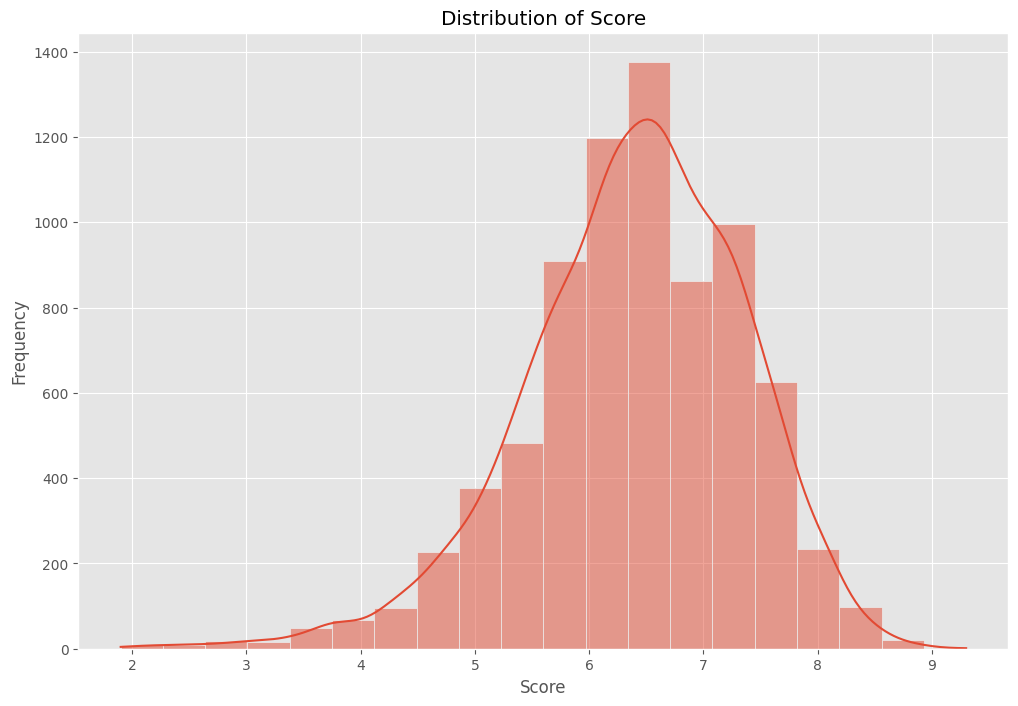

In [14]:
# Histogram of 'score'
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

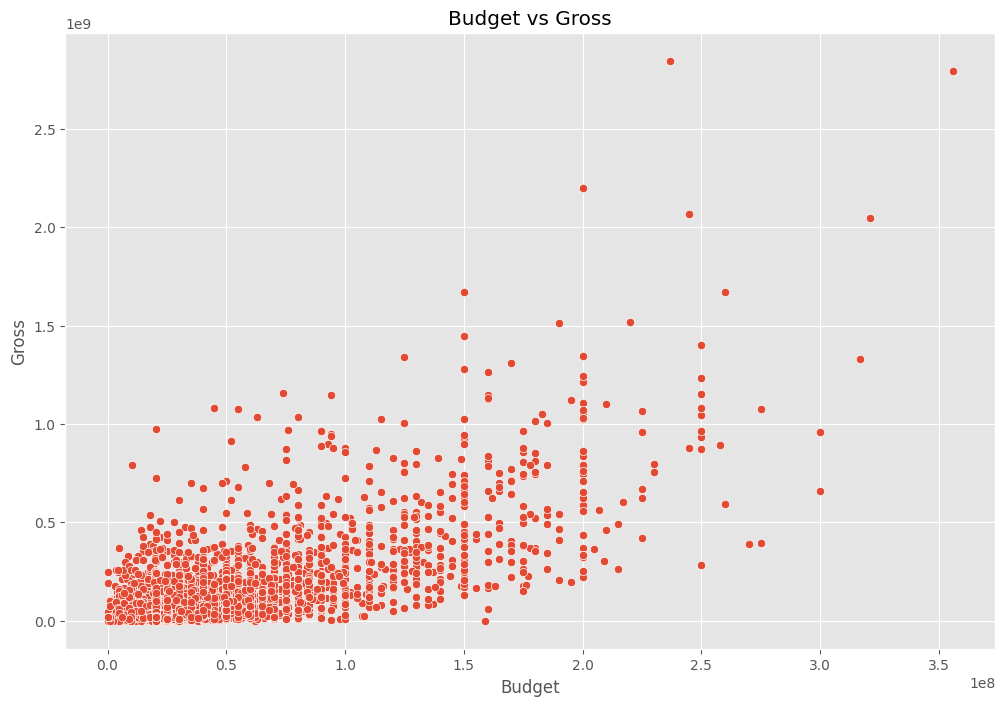

In [15]:
# Scatter plot of 'budget' vs 'gross'
sns.scatterplot(x='budget', y='gross', data=df)
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [16]:
# Example of creating a new feature 'profit'
df['profit'] = df['gross'] - df['budget']
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profit
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,27998772.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,520375067.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,79953539.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,33846344.0


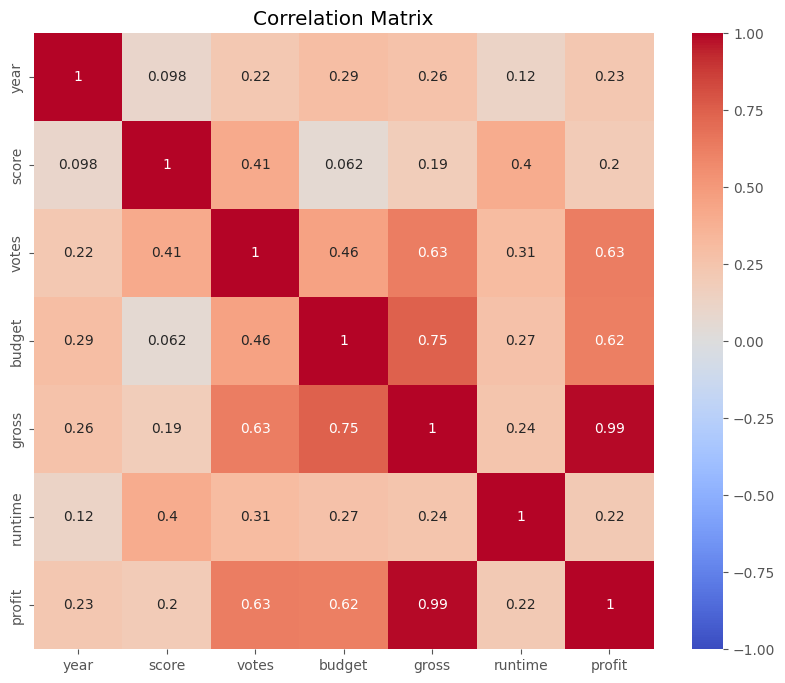

In [17]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlations using Pearson method
correlation_matrix = df[numeric_columns].corr(method='pearson')

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


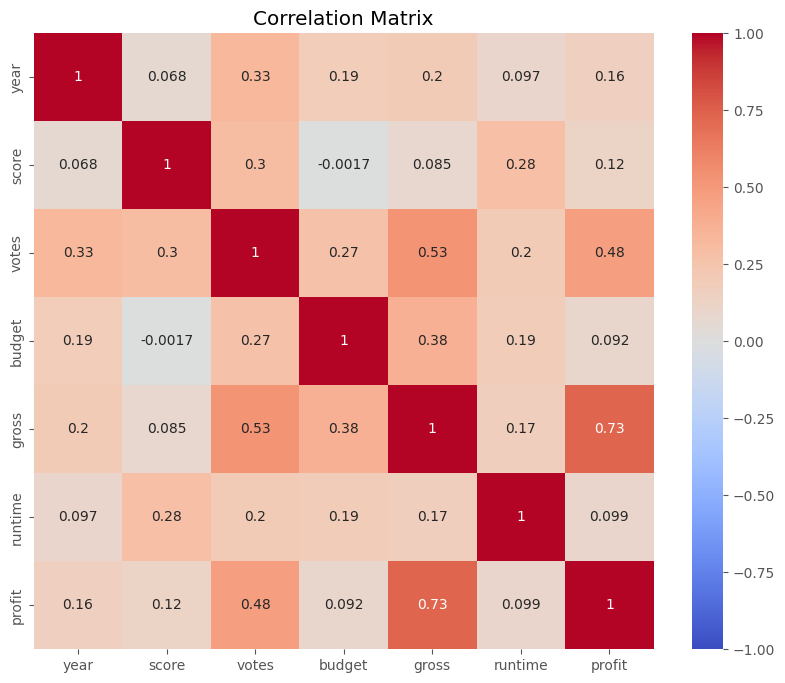

In [18]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlations using Kendall method
correlation_matrix = df[numeric_columns].corr(method='kendall')

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


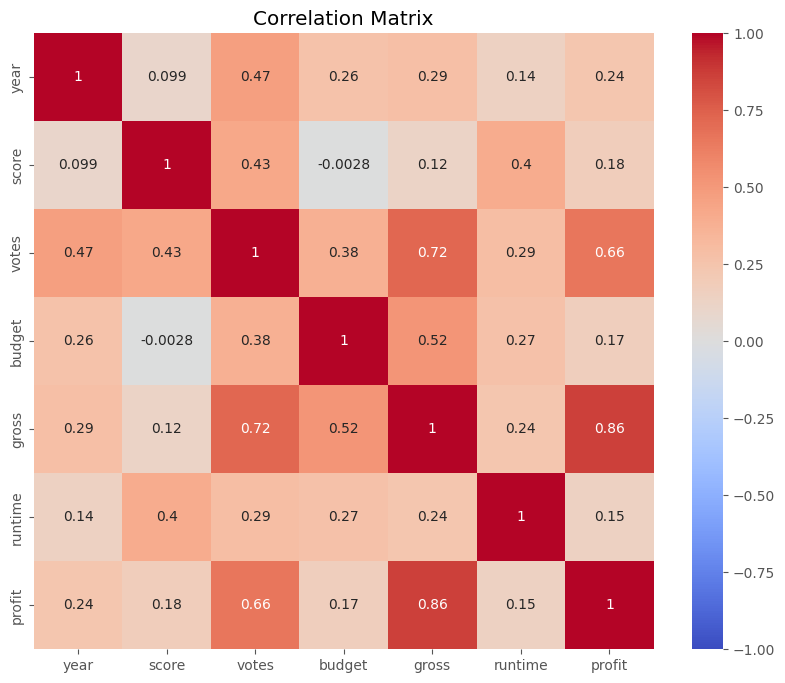

In [19]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlations using Spearman method
correlation_matrix = df[numeric_columns].corr(method='spearman')

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


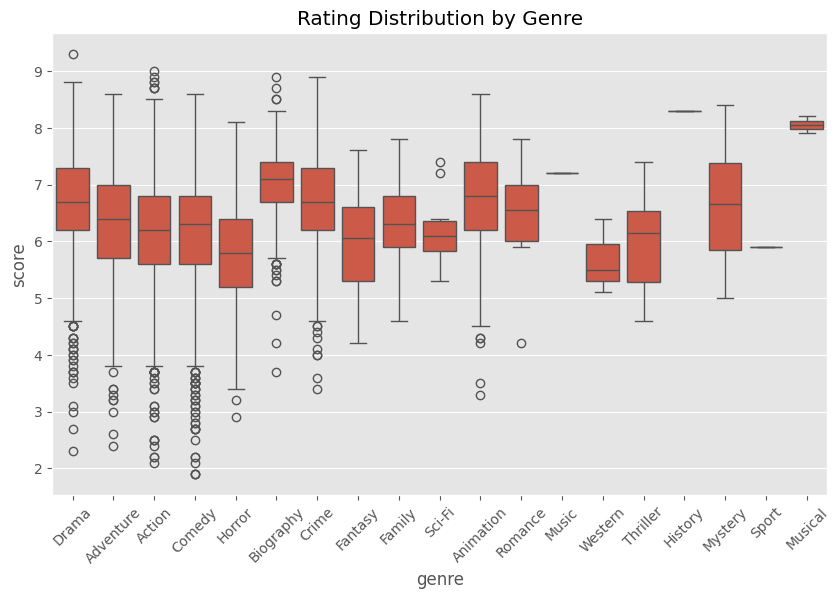

In [20]:
# Example of plotting boxplot for 'score' by 'genre'
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='score', data=df)
plt.title('Rating Distribution by Genre')
plt.xticks(rotation=45)
plt.show()


In [21]:
#Converting datatype of yearcorrect
df['yearcorrect'] = df['yearcorrect'].astype('float64')

Profits by Company in the Last 5 Years:
                          company        profit
520            Universal Pictures  9.988988e+09
530          Walt Disney Pictures  9.776580e+09
361                Marvel Studios  9.009832e+09
532                  Warner Bros.  7.269691e+09
170             Columbia Pictures  6.694536e+09
..                            ...           ...
209  Duplass Brothers Productions -6.253533e+07
256              Fox STAR Studios -7.180501e+07
51                     Appian Way -8.532144e+07
37                 Amazon Studios -9.480736e+07
511           Tribeca Productions -1.580311e+08

[550 rows x 2 columns]

Top 10 Companies by Profit in the Last 5 Years:
                     company        profit
520       Universal Pictures  9.988988e+09
530     Walt Disney Pictures  9.776580e+09
361           Marvel Studios  9.009832e+09
532             Warner Bros.  7.269691e+09
170        Columbia Pictures  6.694536e+09
512    Twentieth Century Fox  6.403904e+09
414       

C:\Users\aakas\AppData\Local\Temp\ipykernel_3056\812489446.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company', y='profit', data=top_10_companies, palette='viridis')


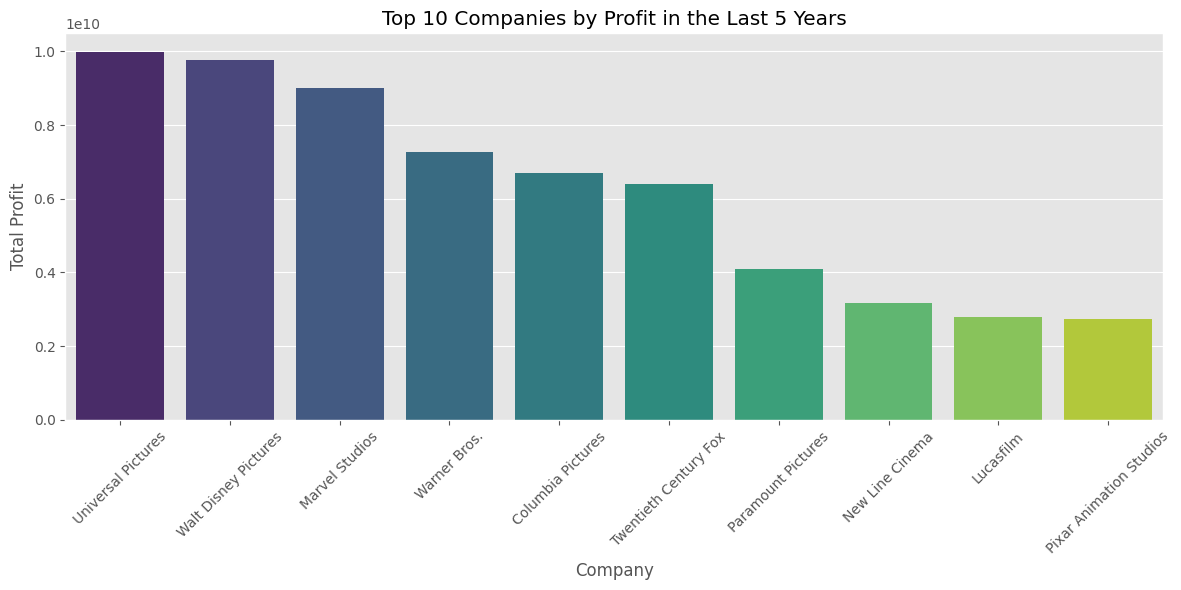

In [22]:
#We are finding which company made most profit in last five year

# Step 1: Filter movies for the last 5 years
current_year = 2020
movies_last_5_years = df[df['yearcorrect'] >= current_year - 5]

# Step 2: Aggregate profits by company
company_profit = movies_last_5_years.groupby('company')['profit'].sum().reset_index()

# Step 3: Sort by profit in descending order
company_profit_sorted = company_profit.sort_values(by='profit', ascending=False)

# Step 4: Print all companies with their profits sorted
print("Profits by Company in the Last 5 Years:")
print(company_profit_sorted)

# Step 5: Select top 10 companies by profit
top_10_companies = company_profit_sorted.head(10)

# Step 6: Print the top 10 companies with their profits
print("\nTop 10 Companies by Profit in the Last 5 Years:")
print(top_10_companies)

# Step 7: Visualize profits by company using a bar plot for top 10 companies
plt.figure(figsize=(12, 6))
sns.barplot(x='company', y='profit', data=top_10_companies, palette='viridis')
plt.title('Top 10 Companies by Profit in the Last 5 Years')
plt.xlabel('Company')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
#Here we are trying to make prediction of Genre of movie using Director and Company

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Select relevant columns
selected_columns = ['director', 'company', 'genre']
df = df[selected_columns]

# Encode categorical variables
le_director = LabelEncoder()
le_company = LabelEncoder()
df['director_Code'] = le_director.fit_transform(df['director'])
df['company_Code'] = le_company.fit_transform(df['company'])

# Define features and target variable
X = df[['director_Code', 'company_Code']]
y = df['genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict genre for test set
y_pred = model_rf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Example prediction for a new movie
new_movie_director = 'Randal Kleiser'
new_movie_company = 'United Artists'
director_code = le_director.transform([new_movie_director])[0]
company_code = le_company.transform([new_movie_company])[0]
predicted_genre = model_rf.predict([[director_code, company_code]])
print(f'Predicted Genre for new movie: {predicted_genre[0]}')


Accuracy: 0.30247718383311606
Predicted Genre for new movie: Action


C:\Users\aakas\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
